In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np


class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)


    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

def calculate_metrics(loader, model):
    y_true = []
    y_pred = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, recall, precision, f1

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.KMNIST(root='./data', download=True, transform=transform)
valset = torchvision.datasets.KMNIST(root='./data', download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)


net = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.018, momentum=0.9)

history = {
    'score_train': [],
    'score_test': [],
    'accuracy_train': [],
    'accuracy_test': [],
    'epochs': [],
}

for epoch in range(3):
    running_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.3f}')

    train_acc, train_rec, train_prec, train_f1 = calculate_metrics(trainloader, net)
    print(f'Training - Accuracy: {train_acc}, Recall: {train_rec}, Precision: {train_prec}, F1 Score: {train_f1}')

    val_acc, val_rec, val_prec, val_f1 = calculate_metrics(valloader, net)
    print(f'Validation - Accuracy: {val_acc}, Recall: {val_rec}, Precision: {val_prec}, F1 Score: {val_f1}')

    history['score_train'].append(train_f1)
    history['score_test'].append(val_f1)
    history['accuracy_train'].append(train_acc)
    history['accuracy_test'].append(val_acc)
    history['epochs'].append(epoch)

print('Finished Training')

Epoch 1, Loss: 0.489
Training - Accuracy: 0.9265833333333333, Recall: 0.9265833333333333, Precision: 0.9298045780565133, F1 Score: 0.9271985866705682
Validation - Accuracy: 0.9265833333333333, Recall: 0.9265833333333333, Precision: 0.9298045780565133, F1 Score: 0.9271985866705682
Epoch 2, Loss: 0.215
Training - Accuracy: 0.9511833333333334, Recall: 0.9511833333333334, Precision: 0.9522974709159507, F1 Score: 0.9511744775986439
Validation - Accuracy: 0.9511833333333334, Recall: 0.9511833333333334, Precision: 0.9522974709159507, F1 Score: 0.9511744775986439
Epoch 3, Loss: 0.149
Training - Accuracy: 0.96275, Recall: 0.96275, Precision: 0.9633163038793761, F1 Score: 0.962646203041748
Validation - Accuracy: 0.96275, Recall: 0.96275, Precision: 0.9633163038793761, F1 Score: 0.962646203041748
Finished Training


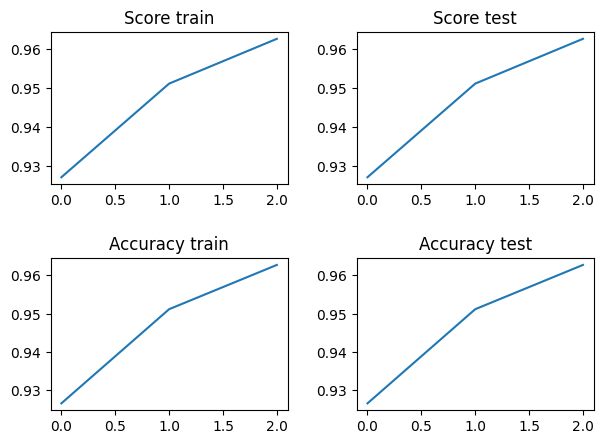

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(history['epochs'], history['score_train'])
ax[0, 0].set_title('Score train')

ax[0, 1].plot(history['epochs'], history['score_test'])
ax[0, 1].set_title('Score test')

ax[1, 0].plot(history['epochs'], history['accuracy_train'])
ax[1, 0].set_title('Accuracy train')

ax[1, 1].plot(history['epochs'], history['accuracy_test'])
ax[1, 1].set_title('Accuracy test')

fig.tight_layout(pad=2.0)

plt.show()